In [1]:
# Import of relevant packages
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif


# Set random seed 
RSEED = 42
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('data/Train.csv')  # Training dataset
test = pd.read_csv('data/Test.csv')  # Test dataset (no labels)
ss = pd.read_csv('data/SampleSubmission.csv')  # Sample submission format
variables = pd.read_csv('data/VariableDefinitions.csv')  # Data dictionary

In [3]:
train.shape

(23524, 13)

In [4]:
train.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [5]:
train.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [6]:
train['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [7]:
train['job_type'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [8]:
train['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

### Train test split

In [9]:
X = train.drop('bank_account', axis = 1)
y = train[['bank_account']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=RSEED)
# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 17643 samples.
Testing set has 5881 samples.


### EDA

In [11]:
df = pd.concat([X_train, y_train], axis=1)

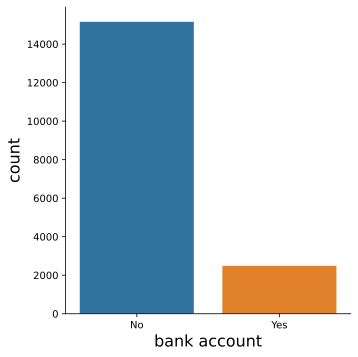

In [12]:
sns.catplot(x="bank_account", kind="count", data=df)
plt.ylabel("count", fontsize = 16)
plt.xlabel("bank account", fontsize = 16)
plt.savefig("results/bank_account")
plt.show()

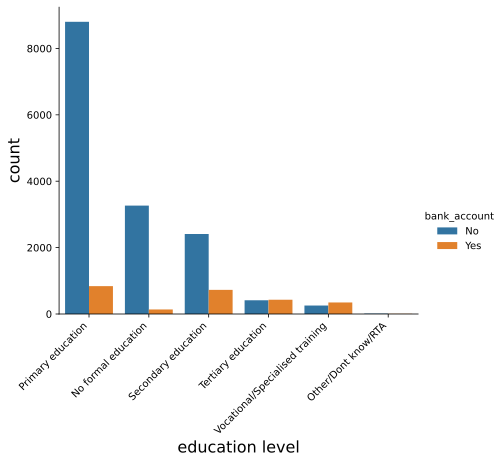

In [13]:
order = (
    df["education_level"]
    .value_counts()
    .index
)

sns.catplot(
    data=df,
    x="education_level",
    hue="bank_account",
    kind="count",
    order=order,
    height=5,
    aspect=1.2
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("count", fontsize = 16)
plt.xlabel("education level", fontsize = 16)
plt.savefig("results/bank_account_edu", bbox_inches="tight")
plt.show()

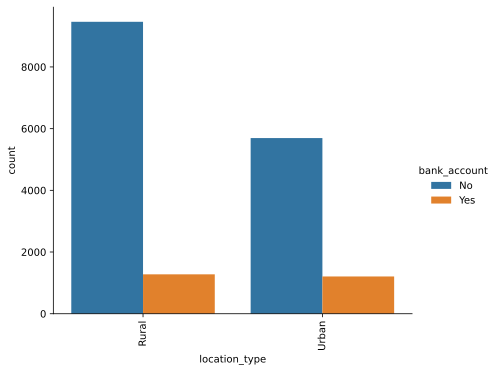

In [14]:
sns.catplot(
    data=df,
    x="location_type",
    hue="bank_account",
    kind="count",
    height=5,
    aspect=1.2
)

plt.xticks(rotation=90)
plt.show()

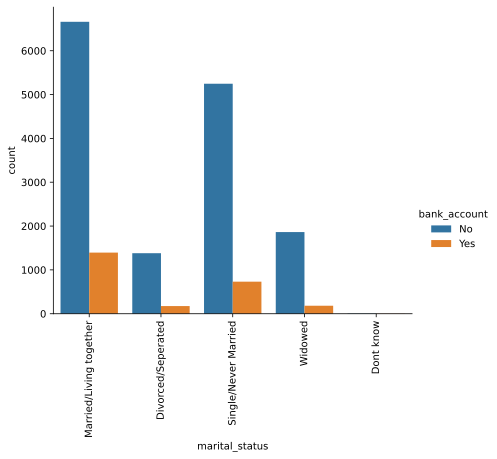

In [15]:
sns.catplot(
    data=df,
    x="marital_status",
    hue="bank_account",
    kind="count",
    height=5,
    aspect=1.2
)

plt.xticks(rotation=90)
plt.show()

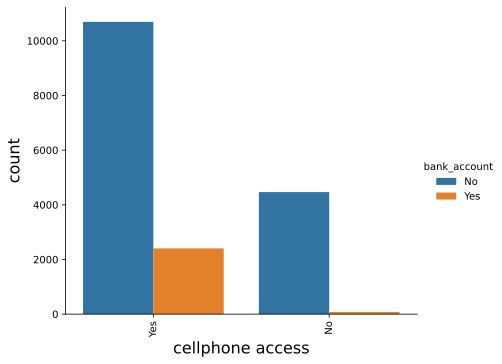

In [16]:
sns.catplot(
    data=df,
    x="cellphone_access",
    hue="bank_account",
    kind="count",
    height=5,
    aspect=1.2
)

plt.xticks(rotation=90)
plt.ylabel("count", fontsize = 16)
plt.xlabel("cellphone access", fontsize = 16)
plt.savefig("results/bank_account_cell")
plt.show()

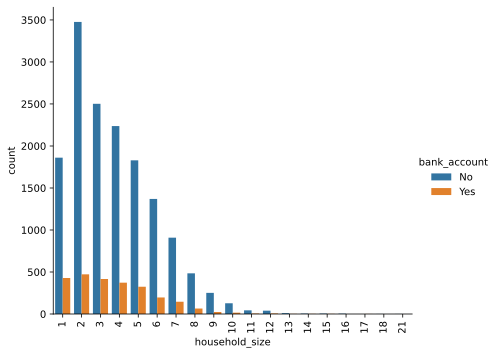

In [17]:
sns.catplot(
    data=df,
    x="household_size",
    hue="bank_account",
    kind="count",
    height=5,
    aspect=1.2
)

plt.xticks(rotation=90)
plt.show()

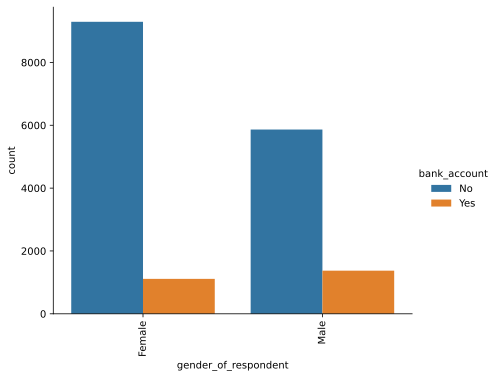

In [18]:
sns.catplot(
    data=df,
    x="gender_of_respondent",
    hue="bank_account",
    kind="count",
    height=5,
    aspect=1.2
)

plt.xticks(rotation=90)
plt.show()

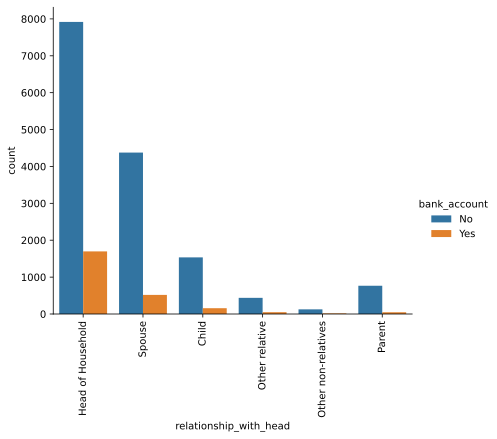

In [19]:
sns.catplot(
    data=df,
    x="relationship_with_head",
    hue="bank_account",
    kind="count",
    height=5,
    aspect=1.2
)

plt.xticks(rotation=90)
plt.show()

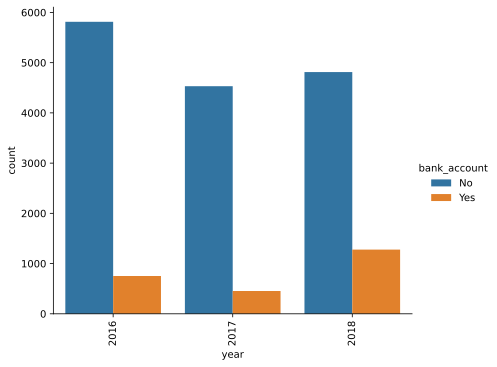

In [20]:
sns.catplot(
    data=df,
    x="year",
    hue="bank_account",
    kind="count",
    height=5,
    aspect=1.2
)

plt.xticks(rotation=90)
plt.show()

In [21]:
df['age_bin'] = pd.cut(train['age_of_respondent'], bins=5)

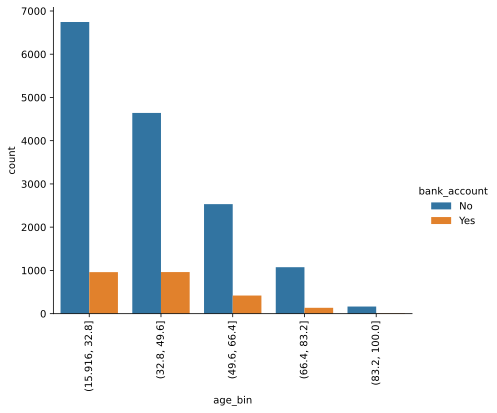

In [22]:
sns.catplot(
    data=df,
    x="age_bin",
    hue="bank_account",
    kind="count",
    height=5,
    aspect=1.2
)

plt.xticks(rotation=90)
plt.show()

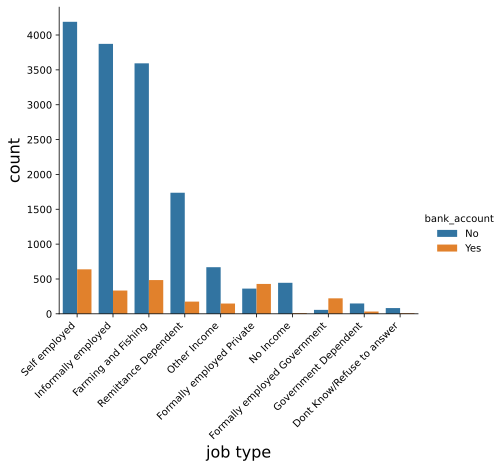

In [23]:
order = (
    df["job_type"]
    .value_counts()
    .index
)

sns.catplot(
    data=df,
    x="job_type",
    hue="bank_account",
    kind="count",
    order=order,
    height=5,
    aspect=1.2
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("count", fontsize = 16)
plt.xlabel("job type", fontsize = 16)
plt.savefig("results/bank_account_job", bbox_inches="tight")
plt.show()

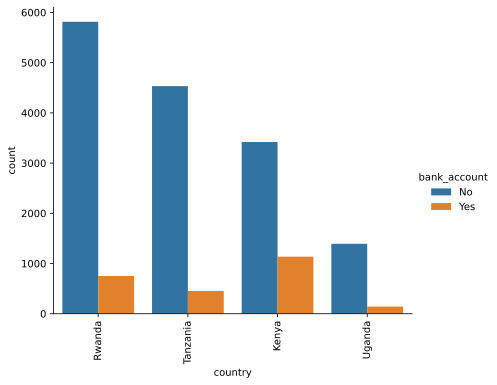

In [24]:
sns.catplot(
    data=df,
    x="country",
    hue="bank_account",
    kind="count",
    height=5,
    aspect=1.2
)

plt.xticks(rotation=90)
plt.show()

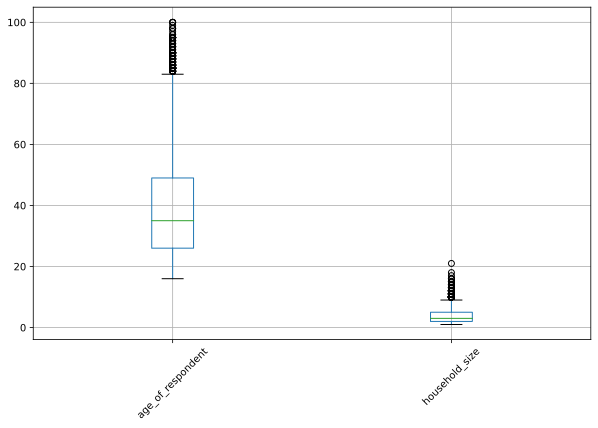

In [25]:
df[['age_of_respondent', 'household_size']].boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()

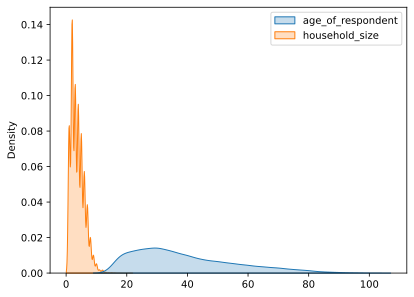

In [26]:
sns.kdeplot(df[['age_of_respondent', 'household_size']], fill=True)
plt.show()

### Cleaning

In [27]:
y_train['bank_account'] = y_train['bank_account'].map({'Yes': 1, 'No': 0})
y_test['bank_account'] = y_test['bank_account'].map({'Yes': 1, 'No': 0})

In [28]:
categorical_variables = ['country', 'year', 'location_type',
       'cellphone_access','gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type']
numerical_variables = ['household_size', 'age_of_respondent']

In [29]:
def clean(df_in):
    df = df_in.copy(deep=True)
    df = df.drop('uniqueid', axis = 1)
    df[numerical_variables] = df[numerical_variables].astype(float)
    return df

In [30]:
X_train = clean(X_train)
X_test = clean(X_test)

### Pipeline for data cleaning and feature engineering

In [31]:
categorical_steps = [('ohe', OneHotEncoder(drop = 'first',sparse_output=False))]
categorical_pipeline = Pipeline(steps=categorical_steps)
numerical_steps = [('scaler', RobustScaler())]
numerical_pipeline = Pipeline(steps=numerical_steps)
transformers = [('categorical_pipeline', categorical_pipeline, categorical_variables),
                  ('numerical_pipeline', numerical_pipeline, numerical_variables)]

preprocessor = ColumnTransformer(transformers=transformers,
                                         remainder = 'drop').set_output(transform='pandas')

In [32]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('categorical_pipeline',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['country', 'year', 'location_type',
                                  'cellphone_access', 'gender_of_respondent',
                                  'relationship_with_head', 'marital_status',
                                  'education_level', 'job_type']),
                                ('numerical_pipeline',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['household_size', 'age_of_respondent'])])

In [33]:
X_train_preprocessed = preprocessor.transform(X_train)

In [34]:
X_train_preprocessed.shape

(17643, 33)

In [35]:
X_test_preprocessed = preprocessor.transform(X_test)
X_test_preprocessed.shape

(5881, 33)

## Baseline Model

### Feature selection

In [36]:
mi = mutual_info_classif(X_train_preprocessed, y_train, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi, index=X_train_preprocessed.columns)
mi_series = mi_series.sort_values(ascending=False)
top_k = 5
top_features = mi_series.head(top_k).index.tolist()
print(top_features)

['categorical_pipeline__cellphone_access_Yes', 'categorical_pipeline__job_type_Formally employed Private', 'categorical_pipeline__education_level_Primary education', 'categorical_pipeline__education_level_Tertiary education', 'categorical_pipeline__job_type_Formally employed Government']


In [37]:
X_train_preprocessed[top_features]

,categorical_pipeline__cellphone_access_Yes,categorical_pipeline__job_type_Formally employed Private,categorical_pipeline__education_level_Primary education,categorical_pipeline__education_level_Tertiary education,categorical_pipeline__job_type_Formally employed Government
8561,1.0,0.0,0.0,0.0,0.0
12157,1.0,0.0,1.0,0.0,0.0
17751,0.0,0.0,1.0,0.0,0.0
7461,0.0,0.0,1.0,0.0,0.0
15747,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
13297,1.0,0.0,1.0,0.0,0.0
14158,1.0,0.0,1.0,0.0,0.0
21715,1.0,0.0,0.0,0.0,0.0
13529,1.0,0.0,0.0,0.0,0.0


### Logistic regression baseline model

In [38]:
baseline = LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [39]:
baseline.fit(X_train_preprocessed[top_features],y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [40]:
y_test_pred_baseline = baseline.predict(X_test_preprocessed[top_features])
y_test_pred_baseline_probs = baseline.predict_proba(
    X_test_preprocessed[top_features]
)[:, 1]

In [41]:
y_test_pred_baseline_probs

array([0.06660078, 0.12004877, 0.57172417, ..., 0.57172417, 0.41113892,
       0.41113892])

In [42]:
print(f"Baseline MAE = {mean_absolute_error(y_test, y_test_pred_baseline)}")
print(f"Baseline roc curve score = {roc_auc_score(y_test, y_test_pred_baseline_probs)}")

Baseline MAE = 0.3057303179731338
Baseline roc curve score = 0.7723741862824112


### Dummy Classifier

In [43]:
from sklearn.dummy import DummyClassifier

In [44]:
y_train.value_counts()/17643

bank_account
0               0.859208
1               0.140792
Name: count, dtype: float64

In [ ]:
dummymodel = DummyClassifier()